In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import coordinates
from skipper import observe
import sys
sys.path.append('../scripts/')
import our_pointings

In [4]:
dbname = '/Users/kadofong/Downloads/db_merian.fits'
telename = '/Users/kadofong/Downloads/tele20230513.csv'

In [7]:
halpha_pointings, oiii_pointings =  our_pointings.load_springfields()

In [13]:
mfilt = 'N540'
cofilt = 'N708'
if cofilt == 'N708':
    skySB_0 = 21.
    teff_min = 200.
elif cofilt == 'N540':
    skySB_0 = 22.1
    teff_min = 300.

In [14]:
coo = observe.CopilotOutput ( dbname, pointings=halpha_pointings,  skySB_0 = skySB_0 )

In [15]:
finished = coo.identify_completed_pointings(teff_min)

In [22]:
mastercat = oiii_pointings

In [24]:
observed_cofilter = coordinates.SkyCoord ( finished['rabore'], finished['decbore'], unit=('deg','deg') )
pointings_mfilter = coordinates.SkyCoord ( mastercat['RA'], mastercat['dec'], unit=('deg','deg') )

In [42]:
idx, d2d, _ = pointings_mfilter.match_to_catalog_sky ( observed_cofilter )

In [43]:
has_observed_match = d2d.to('arcsec').value < 2.

In [52]:
# \\ all observed pointings should have a match in the second filter pointing
assert has_observed_match.sum() == observed_cofilter.shape[0]

In [57]:
mastercat.loc[has_observed_match]

,object,comment,filter,seqtot,seqnum,seqid,expType,proposer,program,RA,propid,dec,expTime,count,wait,priority_name
object,,,,,,,,,,,,,,,,
GAMA_J132337.89-005603.00_N540,GAMA_J132337.89-005603.00_N540,--,N540,704,1,S2021A,object,LeathaudGreene,Merian,200.907909,2020B-0288,-0.934167,900.0,1,False,GAMA
GAMA_J132448.03-010036.00_N540,GAMA_J132448.03-010036.00_N540,--,N540,704,2,S2021A,object,LeathaudGreene,Merian,201.200153,2020B-0288,-1.010001,900.0,1,False,GAMA
GAMA_J132558.78-010316.19_N540,GAMA_J132558.78-010316.19_N540,--,N540,704,3,S2021A,object,LeathaudGreene,Merian,201.494921,2020B-0288,-1.054498,900.0,1,False,GAMA
GAMA_J132709.53-010555.59_N540,GAMA_J132709.53-010555.59_N540,--,N540,704,4,S2021A,object,LeathaudGreene,Merian,201.789712,2020B-0288,-1.098778,900.0,1,False,GAMA
GAMA_J103622.10-005603.00_N540,GAMA_J103622.10-005603.00_N540,--,N540,704,5,S2021A,object,LeathaudGreene,Merian,159.092091,2020B-0288,-0.934167,900.0,1,False,GAMAearly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COSMOS_J100028.65+021728.23_N540,COSMOS_J100028.65+021728.23_N540,--,N540,40,36,S2021A,object,Leauthaud,Merian,150.119391,2020B-0288,2.291176,900.0,1,False,COSMOS
COSMOS_J100039.15+020723.10_N540,COSMOS_J100039.15+020723.10_N540,--,N540,40,37,S2021A,object,Leauthaud,Merian,150.163130,2020B-0288,2.123085,900.0,1,False,COSMOS
COSMOS_J100039.87+021331.51_N540,COSMOS_J100039.87+021331.51_N540,--,N540,40,38,S2021A,object,Leauthaud,Merian,150.166163,2020B-0288,2.225421,900.0,1,False,COSMOS


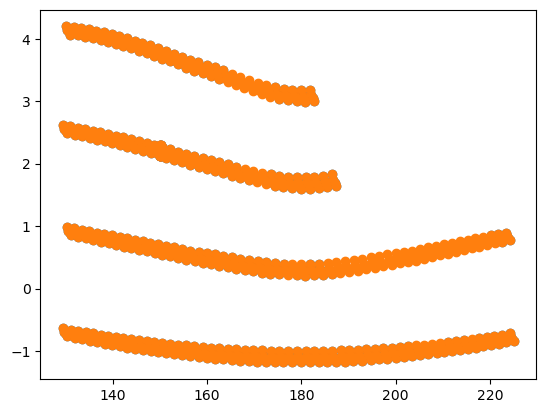

In [41]:
plt.scatter ( observed_cofilter.ra, observed_cofilter.dec )
plt.scatter ( pointings_mfilter.ra, pointings_mfilter.dec )